In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# AD/CN class

In [ ]:
df_tot = pd.read_csv('/content/drive/My Drive/Speech project - Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = RandomForestClassifier(random_state = 0)
clf2 = GridSearchCV(clf2 , param_grid={'max_features' : [19,20,21,22], 'n_estimators':[700,1000,1200,1500]},cv=cv) # ,random_state=0)
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)

GridSearchCV Results : 
Best Accuracy occured whith:  {'max_features': 21, 'n_estimators': 1000}



 
 Cross_Validation Results : 
0.822 accuracy with a standard deviation of 0.023
0.893 AUC with a standard deviation of 0.018
0.814 Recall with a standard deviation of 0.037
0.816 Precision with a standard deviation of 0.036


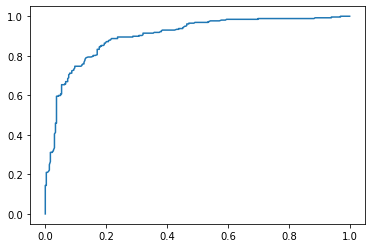

In [ ]:

clf = RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

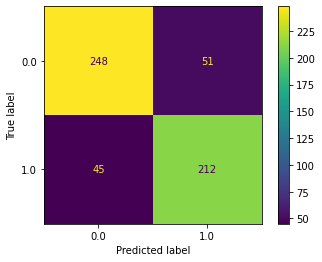

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

## Stages main model

In [ ]:
df_tot = pd.read_csv('/content/drive/My Drive/Speech project - Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = RandomForestClassifier(random_state = 0)
clf2 = GridSearchCV(clf2 , param_grid={'max_features' : [19,20,21,22], 'n_estimators':[700,1000,1200,1500]},cv=cv) # ,random_state=0)
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)


GridSearchCV Results : 
Best Accuracy occured whith:  {'max_features': 21, 'n_estimators': 700}


In [ ]:
clf = RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))



 
 Cross_Validation Results : 
0.715 accuracy with a standard deviation of 0.019
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan


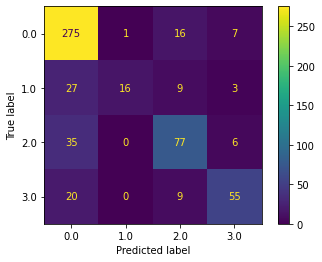

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

# Logistic Regression model 

GridSearchCV Results : 
Best Accuracy occured whith:  {'penalty': 'l2', 'solver': 'newton-cg'}

 
 Cross_Validation Results : 
0.662 accuracy with a standard deviation of 0.025
0.723 AUC with a standard deviation of 0.034
0.560 Recall with a standard deviation of 0.058
0.680 Precision with a standard deviation of 0.034


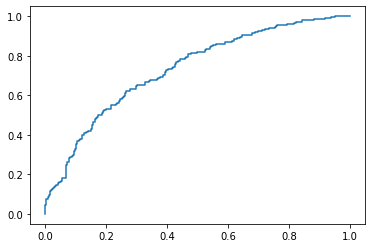

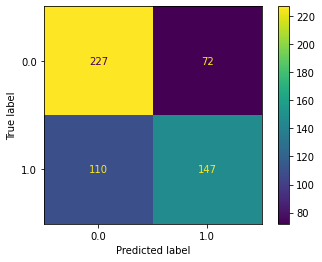

In [ ]:
from sklearn.linear_model import LogisticRegression

df_tot = pd.read_csv('/content/drive/My Drive/Speech project - Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = LogisticRegression(random_state =0)
clf2 = GridSearchCV(clf2 , param_grid={'penalty':['l1', 'l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sa', 'saga'] },cv=8) # ,random_state=0) #
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)


clf = LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

## Stages - logistic


In [ ]:
from sklearn.linear_model import LogisticRegression

df_tot = pd.read_csv('/content/drive/My Drive/Speech project - Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = LogisticRegression(random_state =0)
clf2 = GridSearchCV(clf2 , param_grid={'penalty':['l1', 'l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sa', 'saga'] },cv=8) # ,random_state=0) #
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)

clf = LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))



GridSearchCV Results : 
Best Accuracy occured whith:  {'penalty': 'l2', 'solver': 'newton-cg'}

 
 Cross_Validation Results : 
0.567 accuracy with a standard deviation of 0.012
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan


# SVM model 


 
 Cross_Validation Results : 
0.786 accuracy with a standard deviation of 0.022
0.865 AUC with a standard deviation of 0.029
0.771 Recall with a standard deviation of 0.034
0.782 Precision with a standard deviation of 0.034


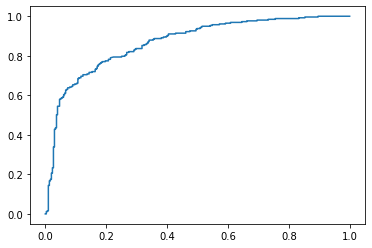

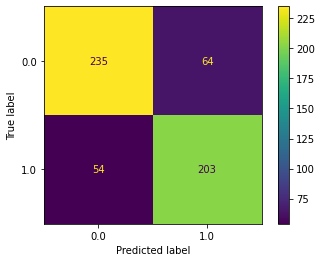

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn import svm


df_tot = pd.read_csv('/content/drive/My Drive/Speech project - Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(probability=True)#LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))

## Stages - svm



 
 Cross_Validation Results : 
0.652 accuracy with a standard deviation of 0.020


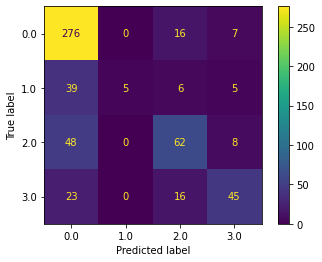

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn import svm


df_tot = pd.read_csv('/content/drive/My Drive/Speech project - Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

import warnings
warnings.filterwarnings("ignore")

cv = 8

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(probability=True)#LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf ,X_test_scaled, y_test) #, clf.predict(X_test_scaled))